In [349]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

sns.color_palette("pastel")
palette=sns.set_style("whitegrid")


# Reading input files

In [350]:
def read_input():
    crimes_df = pd.read_pickle("Cleaned_Crimes_dataframe.pkl")
    census_df = pd.read_pickle("Cleaned_Census_dataframe.pkl")
    return crimes_df,census_df

In [351]:
crimes_df,census_df=read_input()

In [352]:
crimes_df_date = pd.Series(crimes_df.index)
crimes_df_date = pd.to_datetime(crimes_df_date)
crimes_df['day'] = list(crimes_df_date.dt.day_name())
crimes_df['month'] = list(crimes_df_date.dt.month_name())
crimes_df['hour'] = list(crimes_df_date.dt.hour)


In [353]:
def create_mappings(mapping_dict,dataFrame,attribute):
    mapping_cols={}
    for parent_category, child in mapping_dict.items():
        for key in parent_category:
            mapping_cols[key] = child

    dataFrame[attribute] = dataFrame[attribute].map(mapping_cols)
    return dataFrame


In [354]:

grouped_crime_dict = {}
crimes_dict = {  
    ('CRIMINAL TRESPASS','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','HOMICIDE') : 'CRIMINAL CHARGE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN TRAFFICKING',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTICS',
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL CHARGE',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION','ASSAULT') : 'SEXUAL OFFENSE CHARGE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS OFFENSE CHARGE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER CHARGE'
}
#crimes_df=create_mappings(crimes_dict,crimes_df,"grouped_crime_type")

for groups, value in crimes_dict.items():
    for key in groups:
        grouped_crime_dict[key] = value
crimes_df['grouped_crime_type'] = crimes_df.primarytype.map(grouped_crime_dict)

In [355]:
grouped_loc_dict={}
loc_dict = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENTIAL AREA',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS AREA',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC BUILDINGS',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT LOCATONS',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC TRANSPORT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER'  
}


for groups, value in loc_dict.items():
    for key in groups:
        grouped_loc_dict[key] = value
crimes_df['grouped_crime_location'] = crimes_df.locationdescription.map(grouped_loc_dict)

In [356]:
crimes_df["arrest"] = crimes_df["arrest"].astype(int)
crimes_df["domestic"] = crimes_df["domestic"] .astype(int)

In [357]:
crimes_df.head(5)

,block,primarytype,locationdescription,arrest,domestic,district,ward,communityarea,year,latitude,longitude,day,month,hour,grouped_crime_type,grouped_crime_location
date,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,RESIDENCE,0,1,9.0,12.0,61.0,2015,41.815117,-87.670000,Saturday,September,13,NON-CRIMINAL CHARGE,RESIDENTIAL AREA
2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,CTA BUS,0,0,15.0,29.0,25.0,2015,41.895080,-87.765400,Friday,September,11,THEFT,PUBLIC TRANSPORT
2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,SIDEWALK,1,0,14.0,35.0,21.0,2015,41.937406,-87.716650,Saturday,September,12,NARCOTICS,PUBLIC AREA
2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,APARTMENT,0,1,15.0,28.0,25.0,2015,41.881903,-87.755121,Saturday,September,13,SEXUAL OFFENSE CHARGE,RESIDENTIAL AREA
2015-09-05 10:55:00,082XX S LOOMIS BLVD,BURGLARY,RESIDENCE,0,0,6.0,21.0,71.0,2015,41.744379,-87.658431,Saturday,September,10,THEFT,RESIDENTIAL AREA


# Visualisations

## 1. Percentage of different crimes 

([<matplotlib.patches.Wedge at 0x7fe366ea0640>,
 [Text(1.536909961247025, 3.03280526427591, 'THEFT'),
  Text(-3.186964452521084, 1.1845917348888562, 'CRIMINAL CHARGE'),
  Text(-2.3560029817152386, -2.4513771537951703, 'NON-CRIMINAL CHARGE'),
  Text(0.4386441873403306, -3.371585869722517, 'NARCOTICS'),
  Text(2.1920796374420517, -2.598997280320225, 'SEXUAL OFFENSE CHARGE'),
  Text(3.1703129700231973, -1.22846069212763, 'OTHER CHARGE'),
  Text(3.3873891507829534, -0.2925657894524644, 'WEAPONS OFFENSE CHARGE'),
  Text(3.3990277069649792, -0.08130588714474206, 'HUMAN TRAFFICKING')],
 [Text(0.8588614489321608, 1.6948029418012434, '35.1%'),
  Text(-1.7809507234676643, 0.661977734202596, '18.5%'),
  Text(-1.3165899015467506, -1.369887233003183, '18.4%'),
  Text(0.24512469292547884, -1.8841215154331712, '10.1%'),
  Text(1.2249856797470287, -1.4523808331201256, '8.1%'),
  Text(1.7716454832482569, -0.6864927397183813, '7.8%'),
  Text(1.8929527607316503, -0.16349264704696537, '1.2%'),
  Text(1.89

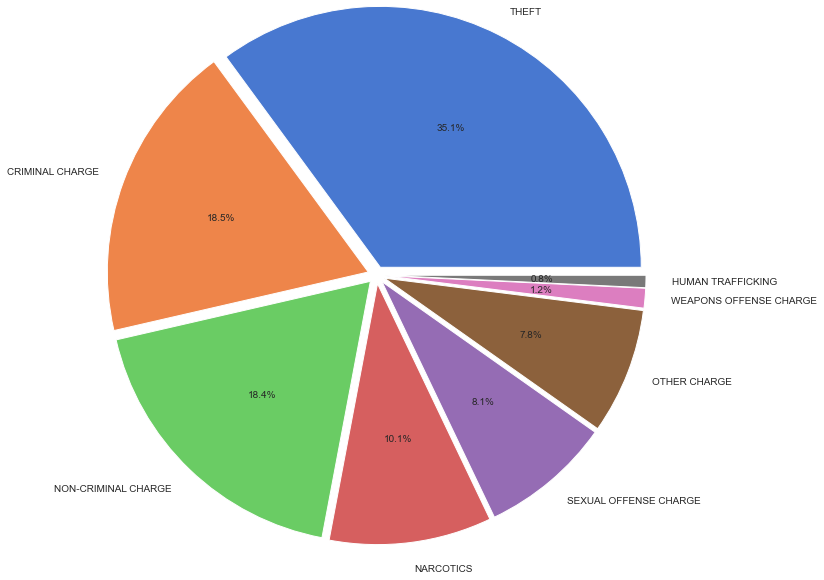

In [358]:
data=crimes_df['grouped_crime_type'].value_counts()
exp = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1)  
plt.pie(data,labels=data.index,autopct='%1.1f%%',radius=3,explode=exp)

## 2. Percentage of crime at different locations

([<matplotlib.patches.Wedge at 0x7fdf793d3ac0>,
 [Text(0.7430833175497163, 3.3178045727829284, 'PUBLIC AREA'),
  Text(-2.8001717082183397, -1.9284808540645635, 'RESIDENTIAL AREA'),
  Text(1.4044959446586196, -3.09635126260531, 'BUSINESS AREA'),
  Text(2.710128473889415, -2.0530961144120443, 'OTHER'),
  Text(3.1455786493983777, -1.2904785780667105, 'PUBLIC BUILDINGS'),
  Text(3.324451726479287, -0.7127557213441985, 'PUBLIC TRANSPORT'),
  Text(3.3868335744830675, -0.29892865161146703, 'VEHICLE'),
  Text(3.399596071662617, -0.05240753319993177, 'GOVERNMENT LOCATONS')],
 [Text(0.41525244216013557, 1.8540672612610478, '43.0%'),
  Text(-1.5648018369455423, -1.0776804772713735, '33.2%'),
  Text(0.7848653808386401, -1.7303139408676727, '11.1%'),
  Text(1.5144835589382022, -1.1473184168773185, '4.7%'),
  Text(1.7578233628990931, -0.7211497936255146, '3.6%'),
  Text(1.8577818471501897, -0.39830466780999324, '2.1%'),
  Text(1.8926422916228902, -0.1670483641358198, '1.8%'),
  Text(1.89977427534087

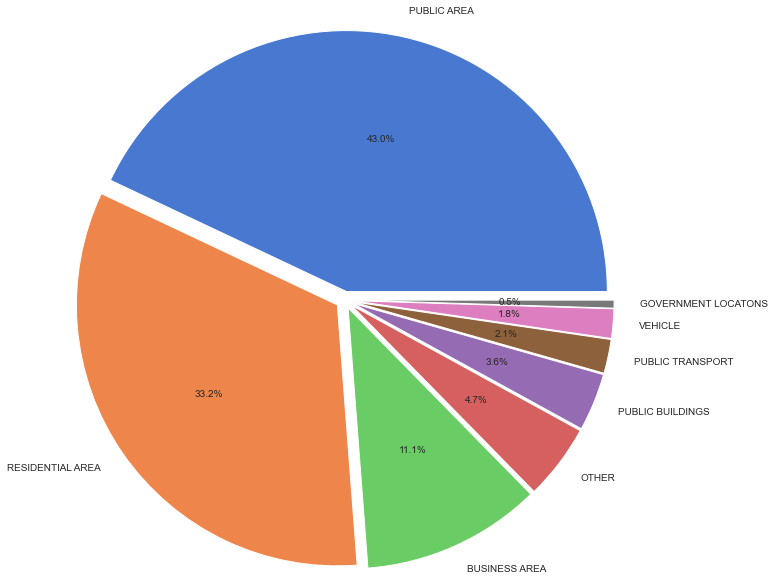

In [359]:
data=crimes_df['grouped_crime_location'].value_counts()
exp = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1)  
plt.pie(data,labels=data.index,autopct='%1.1f%%',radius=3,explode=exp)

## 3.Types of crimes occuring at different locations

[Text(0, 0, 'PUBLIC AREA'),
 Text(1, 0, 'RESIDENTIAL AREA'),
 Text(2, 0, 'BUSINESS AREA'),
 Text(3, 0, 'OTHER'),
 Text(4, 0, 'PUBLIC BUILDINGS'),
 Text(5, 0, 'PUBLIC TRANSPORT'),
 Text(6, 0, 'VEHICLE'),
 Text(7, 0, 'GOVERNMENT LOCATONS')]

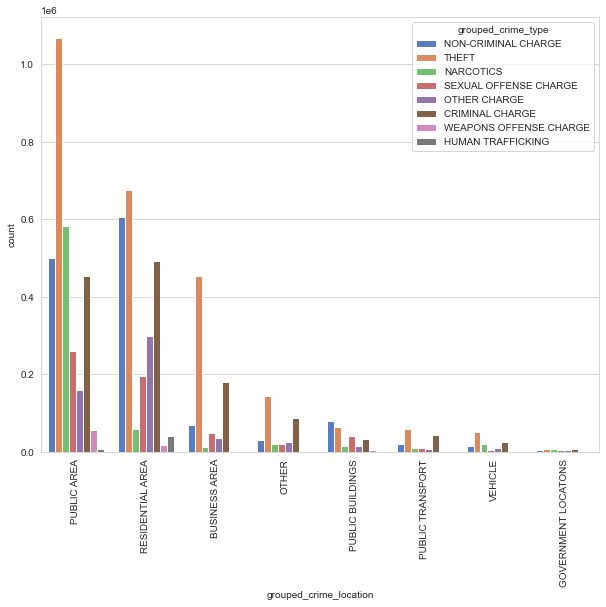

In [360]:
plt.figure(figsize = (10, 8))
count=crimes_df['grouped_crime_location'].value_counts()
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_location', data = crimes_df, order = count.iloc[:10].index,hue='grouped_crime_type')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## Crimes occuring in public area

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'NON-CRIMINAL CHARGE'),
 Text(2, 0, 'CRIMINAL CHARGE'),
 Text(3, 0, 'OTHER CHARGE'),
 Text(4, 0, 'SEXUAL OFFENSE CHARGE'),
 Text(5, 0, 'NARCOTICS'),
 Text(6, 0, 'HUMAN TRAFFICKING'),
 Text(7, 0, 'WEAPONS OFFENSE CHARGE')]

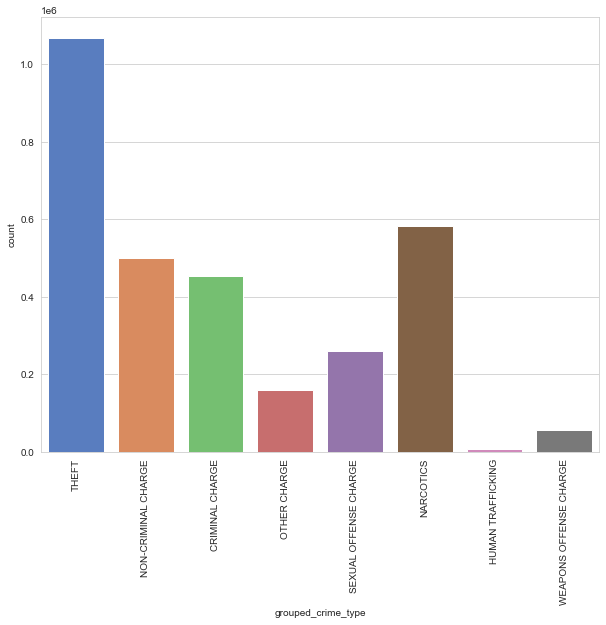

In [361]:
plt.figure(figsize = (10, 8))
publicArea_df = crimes_df[crimes_df.grouped_crime_location == 'PUBLIC AREA']
count=residential_df['grouped_crime_type'].value_counts()
count
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_type', data = publicArea_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## Crimes occuring in residential area

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'NON-CRIMINAL CHARGE'),
 Text(2, 0, 'CRIMINAL CHARGE'),
 Text(3, 0, 'OTHER CHARGE'),
 Text(4, 0, 'SEXUAL OFFENSE CHARGE'),
 Text(5, 0, 'NARCOTICS'),
 Text(6, 0, 'HUMAN TRAFFICKING'),
 Text(7, 0, 'WEAPONS OFFENSE CHARGE')]

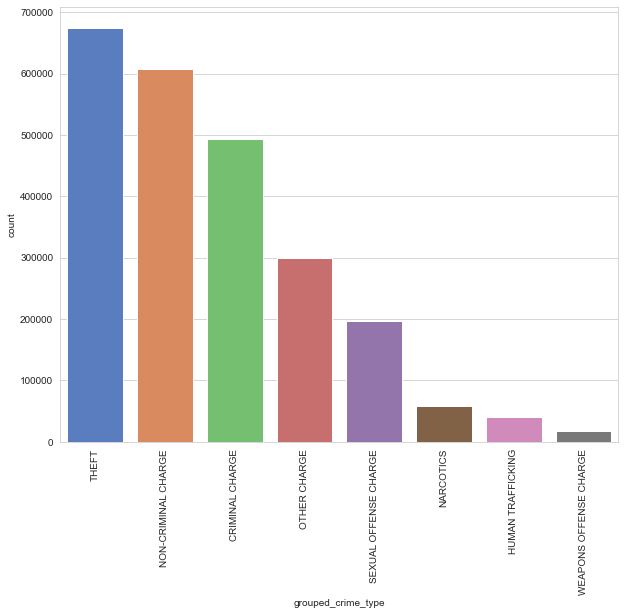

In [362]:
plt.figure(figsize = (10, 8))
residential_df = crimes_df[crimes_df.grouped_crime_location == 'RESIDENTIAL AREA']
count=residential_df['grouped_crime_type'].value_counts()
count
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_type', data = residential_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## Crimes occuring in buisness area

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'CRIMINAL CHARGE'),
 Text(2, 0, 'NON-CRIMINAL CHARGE'),
 Text(3, 0, 'SEXUAL OFFENSE CHARGE'),
 Text(4, 0, 'OTHER CHARGE'),
 Text(5, 0, 'NARCOTICS'),
 Text(6, 0, 'WEAPONS OFFENSE CHARGE'),
 Text(7, 0, 'HUMAN TRAFFICKING')]

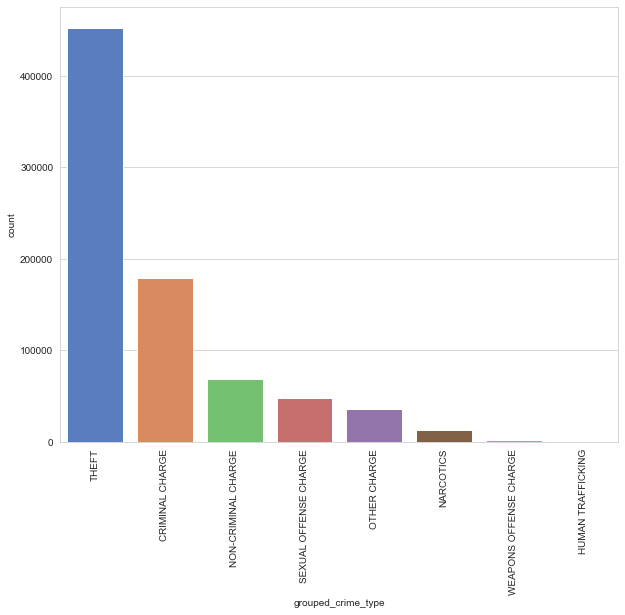

In [363]:
plt.figure(figsize = (10, 8))
bus_df = crimes_df[crimes_df.grouped_crime_location == 'BUSINESS AREA']
count=bus_df['grouped_crime_type'].value_counts()
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_type', data = bus_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

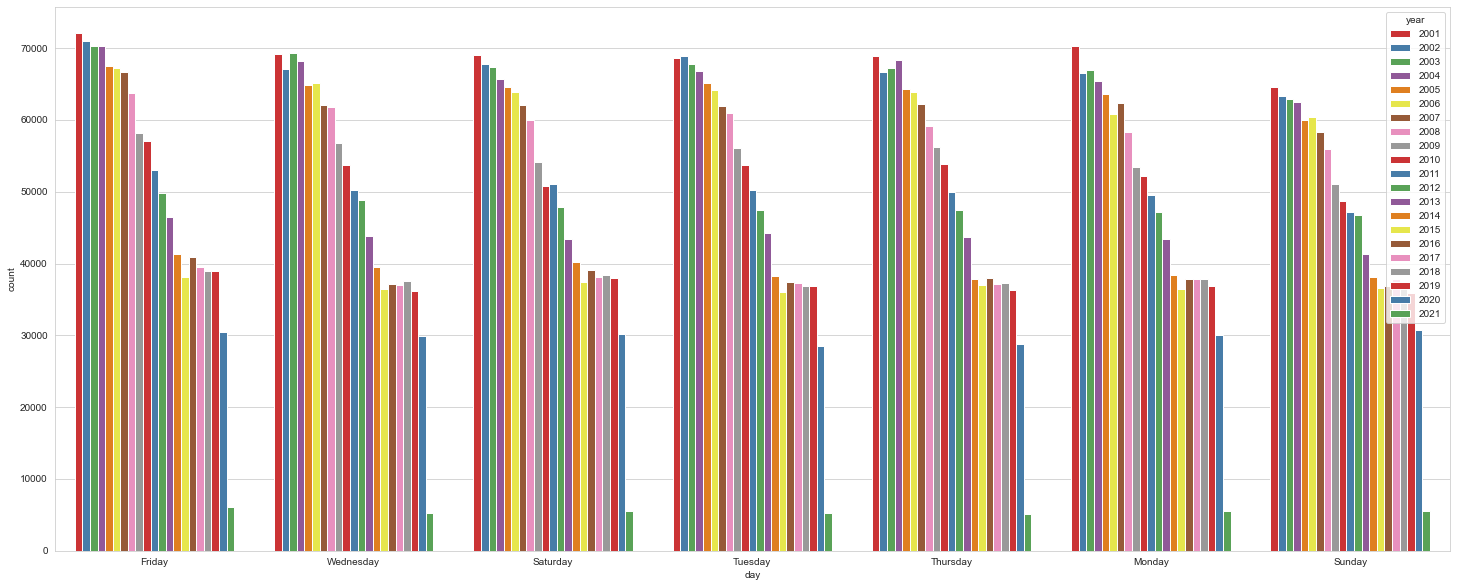

In [364]:
plt.figure(figsize=(25,10))
zone_plot = sns.countplot(data=crimes_df,x='day'
                          ,hue='year',order=crimes_df["day"].value_counts().index,palette='Set1')

## 4.Trends of Crimes in the years

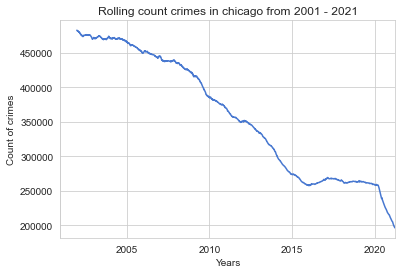

In [371]:
crimes_df, census_df=read_input()
crimes_df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling count crimes in chicago from 2001 - 2021')
plt.ylabel('Count of crimes')
plt.xlabel('Years')
plt.show()

### Count of each crimes

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'BATTERY'),
 Text(2, 0, 'CRIMINAL DAMAGE'),
 Text(3, 0, 'NARCOTICS'),
 Text(4, 0, 'ASSAULT'),
 Text(5, 0, 'OTHER OFFENSE'),
 Text(6, 0, 'BURGLARY'),
 Text(7, 0, 'MOTOR VEHICLE THEFT'),
 Text(8, 0, 'DECEPTIVE PRACTICE'),
 Text(9, 0, 'ROBBERY')]

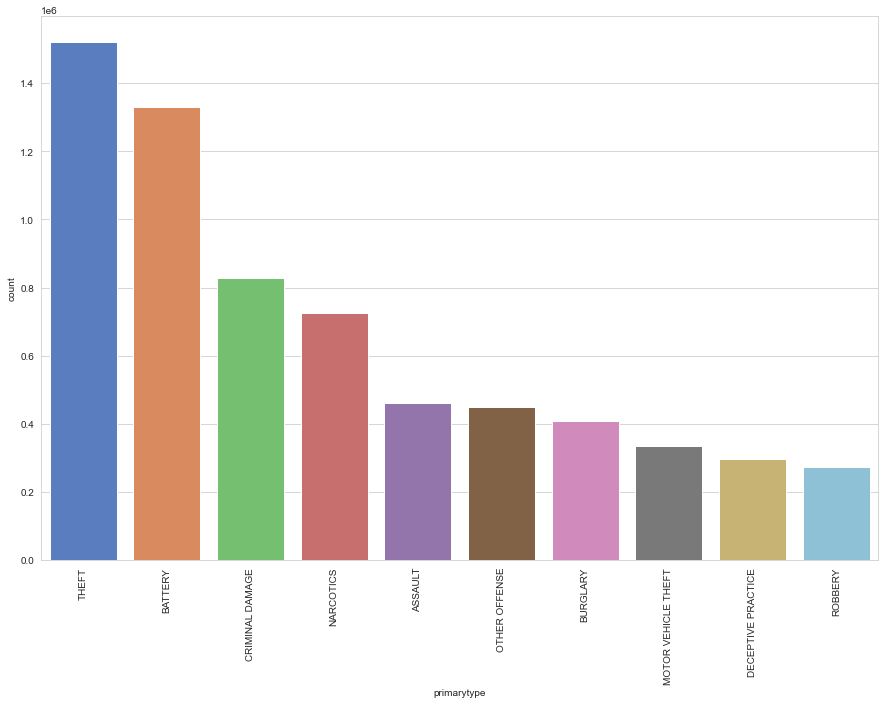

In [365]:
count=crimes_df['primarytype'].value_counts()
plt.figure(figsize = (15, 10))
sns.set_palette("muted")
plot=sns.countplot(x ='primarytype', data = crimes_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### Locations where most crimes are happening

<ipython-input-366-d86398f26cda>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0.0, 0, ''),
 Text(250000.0, 0, ''),
 Text(500000.0, 0, ''),
 Text(750000.0, 0, ''),
 Text(1000000.0, 0, ''),
 Text(1250000.0, 0, ''),
 Text(1500000.0, 0, ''),
 Text(1750000.0, 0, ''),
 Text(2000000.0, 0, '')]

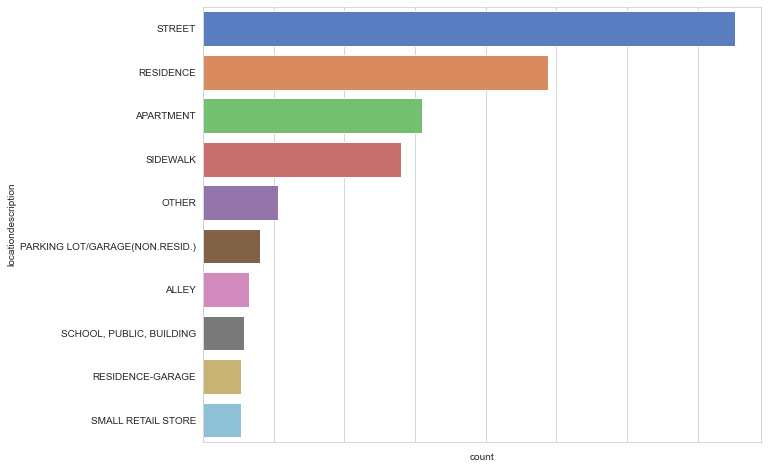

In [366]:
plt.figure(figsize = (10, 8))
sns.set_palette("muted")
count=crimes_df['locationdescription'].value_counts()
plot=sns.countplot(y ='locationdescription', data = crimes_df,order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### 4.Trends of Crimes 

### Trends of Crimes in the years

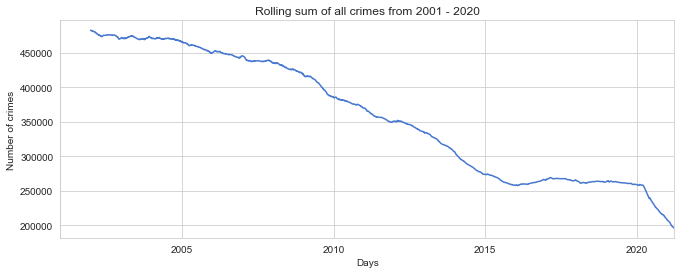

In [390]:
plt.figure(figsize=(11,4))
crimes_df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2020')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

### Trends of Crimes monthly basis

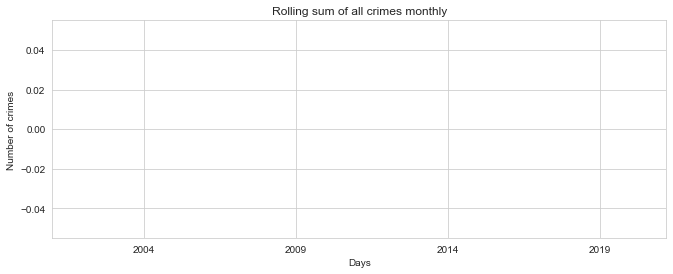

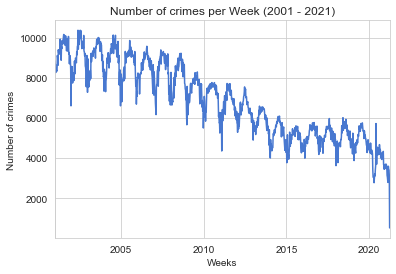

In [369]:
crimes_df, census_df=read_input()
crimes_df=crimes_df.resample('W')
crimes_df.size().plot(legend=False)
plt.title('Number of crimes per Week (2001 - 2021)')
plt.xlabel('Weeks')
plt.ylabel('Number of crimes')
plt.show()

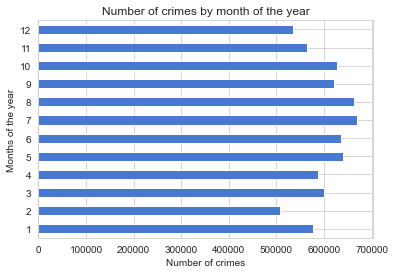

In [376]:
'''2. Crimes happening monthwise'''
crimes_df.groupby([crimes_df.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

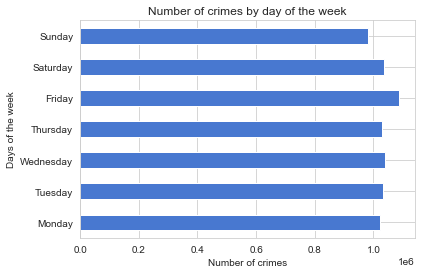

In [378]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes_df.groupby([crimes_df.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()